# CLASSIFICATION IN MedNIST DATASET

In [20]:
import os
import numpy as np
import pandas as pd
import scipy
import sklearn
import keras
from keras.models import Sequential
# import cv2
from skimage import io
%matplotlib inline
import imageio
from sklearn.model_selection import train_test_split

In [2]:
import cv2

listdir will get all the file name inside the folder

abdomen=os.listdir("F:/Downloads/MedMnist/AbdomenCT")
breast=os.listdir("F:/Downloads/MedMnist/BreastMRI")
chest=os.listdir("F:/Downloads/MedMnist/ChestCT")
cxr=os.listdir("F:/Downloads/MedMnist/CXR")
hand=os.listdir("F:/Downloads/MedMnist/Hand")
head=os.listdir("F:/Downloads/MedMnist/HeadCT")

In [4]:
filepath="F:/Downloads/MedMnist/AbdomenCT/"
filepath1="F:/Downloads/MedMnist/BreastMRI/"
filepath2="F:/Downloads/MedMnist/ChestCT/"
filepath3="F:/Downloads/MedMnist/CXR/"
filepath4="F:/Downloads/MedMnist/Hand/"
filepath5="F:/Downloads/MedMnist/HeadCT/"

Reading images in the form of aaray of pixel values

In [6]:
images=[]
label = []
for i in abdomen:
    image = imageio.imread(filepath+i)
    images.append(image)
    label.append(0) #for abdomen images

for i in breast:
    image = imageio.imread(filepath1+i)
    images.append(image)
    label.append(1) #for breast MRI images
for i in chest:
    image = imageio.imread(filepath2+i)
    images.append(image)
    label.append(2) #for chest images
for i in cxr:
    image = imageio.imread(filepath3+i)
    images.append(image)
    label.append(3) #for cxr images
for i in hand:
    image = imageio.imread(filepath4+i)
    images.append(image)
    label.append(4) #for hand images
for i in head:
    image = imageio.imread(filepath5+i)
    images.append(image)
    label.append(5) #for head images

Populating the interactive namespace from numpy and matplotlib


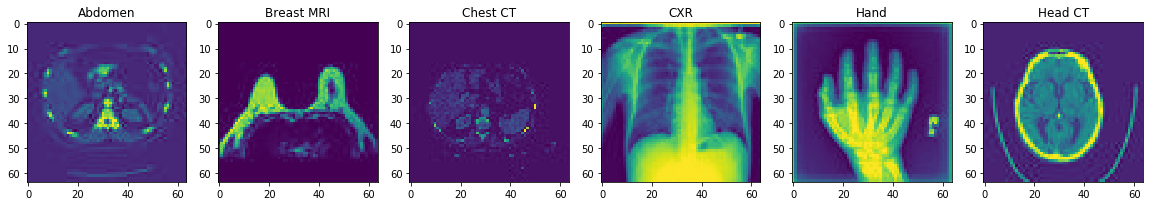

In [64]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('F:/Downloads/MedMnist/AbdomenCT/000000.jpeg')
plt.figure(figsize=(20,10))
plt.subplot(1, 6, 1)
imgplot = plt.imshow(img)
plt.title('Abdomen')
img = mpimg.imread('F:/Downloads/MedMnist/BreastMRI/000000.jpeg')
plt.subplot(1, 6, 2)
imgplot = plt.imshow(img)
plt.title('Breast MRI')
img = mpimg.imread('F:/Downloads/MedMnist/ChestCT/000000.jpeg')
plt.subplot(1, 6, 3)
imgplot = plt.imshow(img)
plt.title('Chest CT')
img = mpimg.imread('F:/Downloads/MedMnist/CXR/000000.jpeg')
plt.subplot(1, 6, 4)
imgplot = plt.imshow(img)
plt.title('CXR')
img = mpimg.imread('F:/Downloads/MedMnist/hand/000000.jpeg')
plt.subplot(1, 6, 5)
imgplot = plt.imshow(img)
plt.title('Hand')
img = mpimg.imread('F:/Downloads/MedMnist/headCT/000000.jpeg')
plt.subplot(1, 6, 6)
imgplot = plt.imshow(img)
plt.title('Head CT')
plt.show()

In [11]:
len(images[0][0])

64

In [13]:
images[0]

array([[101, 101, 101, ..., 101, 101, 101],
       [101, 101, 101, ..., 101, 101, 101],
       [101, 101, 101, ..., 101, 101, 101],
       ...,
       [101, 101, 101, ..., 101, 101, 101],
       [101, 101, 101, ..., 101, 101, 101],
       [101, 101, 101, ..., 101, 101, 101]], dtype=uint8)

In [12]:
for i in range(0,23000):
    images[i]=cv2.resize(images[i],(64,64))

CNN takes image in the form of Numpy arrays

In [14]:
#converting images to arrays
images=np.array(images)
label=np.array(label)

In [18]:
label

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

Defining hyperparameters

In [15]:
filters=10
filtersize=(5,5)

epochs =25
batchsize=128

input_shape=(64,64,1)

Converting the target variable to the required size

In [16]:
from keras.utils.np_utils import to_categorical
label = to_categorical(label)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(images, label, test_size=0.33)

In [29]:
x_test.shape

(19455, 64, 64)

In [30]:
x_train=x_train.reshape([39499, 64, 64,1])
x_test=x_test.reshape([19455, 64, 64,1])

Defining the model

In [31]:
model = Sequential()

model.add(keras.layers.InputLayer(input_shape=input_shape))

model.add(keras.layers.convolutional.Conv2D(filters, filtersize, strides=(1, 1), padding='valid', data_format="channels_last", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.convolutional.Conv2D(filters, filtersize, strides=(1, 1), padding='valid', data_format="channels_last", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=6, input_dim=50,activation='softmax'))

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epochs, batch_size=batchsize,validation_split=0.3)

model.summary()

Train on 27649 samples, validate on 11850 samples
Epoch 1/25
27649/27649 [==============================] - 160s 6ms/step - loss: 2.0461 - accuracy: 0.8125 - val_loss: 0.6819 - val_accuracy: 0.8318
Epoch 2/25
27649/27649 [==============================] - 200s 7ms/step - loss: 0.1361 - accuracy: 0.9583 - val_loss: 0.2452 - val_accuracy: 0.9324
Epoch 3/25
27649/27649 [==============================] - 243s 9ms/step - loss: 0.0581 - accuracy: 0.9833 - val_loss: 0.0698 - val_accuracy: 0.9890
Epoch 4/25
27649/27649 [==============================] - 256s 9ms/step - loss: 0.0282 - accuracy: 0.9928 - val_loss: 0.0434 - val_accuracy: 0.9922
Epoch 5/25
27649/27649 [==============================] - 257s 9ms/step - loss: 0.0652 - accuracy: 0.9803 - val_loss: 0.0498 - val_accuracy: 0.9914
Epoch 6/25
27649/27649 [==============================] - 245s 9ms/step - loss: 0.0240 - accuracy: 0.9927 - val_loss: 0.0487 - val_accuracy: 0.9912
Epoch 7/25
27649/27649 [==============================] - 156s

In [33]:
_, acc = model.evaluate(x_test, y_test, verbose=0)

In [34]:
print(acc)

0.9922899007797241


In [35]:
ypred=model.predict(x_test)

In [44]:
y_pred=[]
for i in range(len(ypred)):
    y_pred.append(np.argmax(ypred[i]))

In [46]:
y_test1=[]
for i in range(len(y_test)):
    y_test1.append(np.argmax(y_test[i]))

In [48]:
for i in range(len(y_pred)):
    print(y_pred[i],y_test1[i])

0 0
5 5
1 1
4 4
5 5
3 3
0 0
1 1
1 1
4 4
4 4
3 3
4 4
2 2
0 0
5 5
2 2
0 0
5 5
0 0
2 2
4 4
4 4
0 0
2 2
1 1
1 1
5 5
4 4
4 4
0 0
2 2
2 2
5 5
2 2
5 5
3 3
3 3
1 1
4 4
4 4
2 2
4 4
4 4
3 3
0 0
2 2
2 2
1 1
0 0
1 1
4 4
2 2
0 0
4 4
5 5
5 5
3 3
2 2
0 0
4 4
0 0
0 0
5 5
1 1
5 5
3 3
0 0
3 3
5 5
4 4
4 4
0 0
4 4
5 5
2 2
0 0
5 5
0 0
2 2
4 4
3 3
1 1
2 2
4 4
2 2
0 0
3 3
4 4
3 3
0 0
0 0
5 5
3 3
5 5
1 1
0 0
2 2
4 4
4 4
4 4
3 3
0 0
3 3
2 2
0 0
1 1
2 2
3 3
2 2
1 1
5 5
4 4
4 4
5 5
2 2
1 1
4 4
0 0
1 1
3 3
4 4
0 0
0 0
2 2
3 3
3 3
0 0
5 5
1 1
5 5
0 0
4 4
2 2
1 1
0 0
5 5
4 4
2 2
4 4
1 1
4 4
3 3
0 0
2 2
1 1
4 4
2 2
2 2
4 4
1 1
4 4
0 0
1 1
4 4
0 0
1 1
2 2
2 2
5 5
5 5
5 5
4 4
5 5
3 3
2 2
3 3
4 4
0 0
0 0
2 2
2 2
3 3
1 1
1 1
4 4
0 0
2 2
5 5
5 5
0 0
5 5
3 3
4 4
0 0
4 4
3 3
5 5
4 4
4 4
4 4
4 4
3 3
1 1
3 3
3 3
4 4
2 2
1 1
4 4
0 0
3 3
4 4
0 0
1 1
2 2
2 2
3 3
5 5
1 1
3 3
3 3
5 5
3 3
2 2
3 3
4 4
3 3
4 4
5 5
2 2
2 2
2 2
0 0
3 3
1 1
0 0
3 3
5 5
2 2
3 3
2 2
0 0
0 0
0 0
5 5
3 3
2 5
1 1
5 5
3 3
5 5
3 3
3 3
0 0
1 1
1 1
2 2
2 2
4 4


1 1
3 3
1 1
1 1
3 3
5 5
5 5
5 5
0 0
2 2
4 4
0 0
0 0
1 1
3 3
5 5
4 4
5 5
4 4
4 4
4 4
3 3
0 0
3 3
4 4
5 5
3 3
2 2
2 2
3 3
3 3
3 3
2 2
1 1
4 4
2 2
3 3
0 0
0 0
5 5
2 2
1 1
0 0
2 2
0 0
5 5
1 1
5 5
0 0
3 3
0 0
5 5
5 5
5 5
5 5
1 1
3 3
4 4
3 3
5 5
5 5
1 1
4 4
5 5
2 2
1 1
0 0
3 3
5 5
5 5
0 0
4 4
5 5
0 0
1 1
4 4
3 3
3 3
0 0
0 0
1 1
1 1
4 4
4 4
5 5
5 5
0 0
2 2
5 5
0 0
4 4
1 1
0 0
4 4
5 5
2 2
5 5
0 0
3 3
0 0
4 4
2 2
2 2
0 0
5 5
0 0
3 3
3 3
0 0
5 5
1 1
2 2
1 1
5 4
1 1
1 1
3 3
3 3
5 5
5 5
2 5
0 0
1 1
5 5
0 0
5 5
2 2
4 4
2 2
4 4
3 3
4 4
5 5
2 2
1 1
2 2
0 0
3 3
4 4
2 2
3 3
3 3
3 3
2 2
0 0
3 3
1 1
4 4
0 0
2 2
4 4
3 3
4 4
0 0
1 1
2 2
2 2
1 1
1 1
5 5
4 4
5 5
4 4
2 2
0 0
1 1
0 0
0 0
4 4
3 3
5 5
5 5
3 3
3 3
3 3
2 2
2 2
0 0
4 3
1 1
2 2
4 4
4 4
0 0
5 5
0 2
0 0
3 3
2 2
0 0
0 0
0 0
4 4
3 3
0 0
5 5
5 5
5 5
2 2
2 2
3 3
3 3
2 2
1 1
1 1
5 5
1 1
4 4
3 3
4 4
2 2
0 0
2 2
4 4
4 4
0 0
2 2
1 1
2 2
2 2
5 5
0 0
5 5
2 2
3 3
5 5
5 5
2 2
0 0
2 2
3 3
2 2
5 5
2 2
1 1
3 3
4 4
2 2
3 3
4 4
0 0
2 2
2 2
1 1
4 4
5 5
3 3
1 1
5 5
2 2


4 4
1 1
1 1
0 0
5 5
1 1
5 5
3 3
5 5
4 4
1 1
0 0
5 5
5 5
2 2
4 4
2 2
5 5
2 2
5 5
3 3
1 1
1 1
2 2
3 3
1 1
2 2
0 0
4 4
5 5
2 2
3 3
2 2
4 4
3 3
0 0
4 4
0 0
1 1
4 4
0 0
5 5
0 0
3 3
5 5
1 1
5 5
0 0
4 4
0 0
2 2
4 4
1 1
0 0
5 5
4 4
3 3
1 1
0 0
3 3
0 0
0 0
5 5
3 3
3 3
0 0
1 1
1 1
3 3
4 4
5 5
2 2
4 4
3 3
3 3
0 0
5 5
2 2
1 1
5 5
4 4
2 2
0 0
4 4
0 0
2 2
4 4
2 2
1 1
5 5
3 3
3 3
2 2
2 2
1 1
5 5
4 4
1 1
3 3
4 4
3 3
4 4
3 3
0 0
0 0
1 1
3 3
5 5
5 5
5 5
3 3
5 5
4 4
1 1
0 0
2 2
2 2
5 5
4 4
5 5
5 5
5 5
0 0
0 0
1 1
2 2
1 1
4 5
3 3
0 0
2 2
5 5
5 5
4 4
0 0
5 5
0 0
3 3
3 3
5 5
5 5
2 2
3 3
2 2
2 2
1 1
4 4
2 2
2 2
1 1
4 4
4 4
1 1
5 5
4 4
2 2
3 3
5 5
1 1
5 5
2 2
0 0
0 0
4 4
3 3
0 0
0 0
0 0
0 0
2 2
3 3
5 5
5 5
4 4
0 0
3 3
3 3
2 2
1 1
1 1
1 1
5 3
2 2
0 0
4 4
2 2
5 5
3 3
2 2
2 2
3 3
4 4
2 2
1 1
5 5
1 1
1 1
2 2
1 1
1 1
2 2
4 4
3 3
3 3
4 4
2 2
0 0
3 3
2 2
5 5
1 1
5 5
1 1
0 0
5 5
1 1
2 2
5 5
0 0
4 4
5 5
5 5
3 3
1 1
0 0
0 0
0 0
2 2
5 5
3 3
1 1
4 4
4 4
4 4
5 5
2 2
0 0
5 5
4 4
4 4
2 2
0 0
5 5
2 2
0 0
2 2
2 2
0 0
5 5
3 3


3 3
1 1
3 3
4 4
2 2
5 5
4 4
2 2
2 2
0 0
1 1
1 1
5 5
5 5
2 2
5 5
1 1
3 3
1 1
5 5
1 1
3 3
1 1
0 0
2 2
0 0
5 5
0 0
3 3
4 4
3 3
5 5
0 0
2 2
2 2
3 3
1 1
5 5
5 5
3 3
0 0
3 3
1 1
1 1
1 1
1 1
4 4
2 2
1 1
3 3
4 4
0 0
0 0
5 5
3 3
0 0
1 1
4 4
4 4
0 0
1 1
3 3
0 0
3 3
5 5
3 3
3 3
0 0
5 5
0 0
5 5
1 1
2 2
2 2
2 2
3 3
0 0
0 0
0 0
5 5
2 2
2 2
5 5
4 4
2 2
2 2
3 3
1 1
2 2
0 0
0 0
3 3
4 4
0 0
3 3
5 5
0 0
1 1
2 2
0 0
2 2
4 4
3 3
2 2
3 3
5 5
0 0
3 3
0 0
5 5
4 4
3 3
5 5
0 0
0 0
4 4
0 0
3 3
5 5
0 0
3 3
0 0
3 3
2 2
3 3
1 1
5 5
0 0
4 4
0 0
4 4
0 0
4 4
5 5
3 3
0 0
1 1
0 0
2 2
0 0
5 5
3 3
1 1
3 3
5 5
4 4
0 0
4 4
3 3
4 4
2 2
1 1
4 4
2 2
4 4
1 1
4 4
5 5
0 0
0 0
2 2
4 4
0 0
5 5
0 0
3 3
5 5
5 5
0 0
5 5
1 1
5 5
2 2
1 1
4 4
5 5
1 1
0 0
1 1
4 4
4 4
4 4
3 3
2 2
1 1
3 3
1 1
1 1
1 1
3 3
3 3
5 5
0 0
2 2
1 1
1 1
0 0
1 1
4 4
4 4
1 1
5 5
0 0
5 5
1 1
4 4
3 3
5 5
0 0
4 4
1 1
1 1
4 4
2 2
3 3
1 1
3 3
2 2
0 0
4 4
5 5
0 0
4 4
0 0
1 1
4 4
4 4
4 4
4 4
0 0
3 3
1 1
4 4
4 4
0 0
4 4
4 4
4 4
0 0
2 2
3 3
0 0
1 1
0 0
0 0
3 3
3 3
1 1
5 5
3 3


5 5
0 0
0 0
0 0
0 0
4 4
1 1
5 5
1 1
0 0
1 1
3 3
4 4
5 5
3 3
4 4
0 0
3 3
3 3
0 0
4 4
0 0
2 2
4 4
1 1
0 0
0 0
2 2
0 0
0 0
0 0
5 5
0 0
5 5
5 5
5 5
0 0
5 5
3 3
0 0
0 0
1 1
2 2
2 2
3 3
0 0
5 5
2 2
0 0
0 0
2 2
2 2
5 5
2 2
3 3
5 5
5 5
2 2
2 2
0 0
3 3
3 3
4 4
1 1
1 1
5 5
5 5
1 1
5 5
5 5
2 2
1 1
0 0
4 4
3 3
3 3
5 5
1 1
2 2
0 0
0 0
1 1
1 1
5 5
4 4
3 3
2 2
0 0
0 0
4 4
2 2
0 0
1 1
0 0
1 1
3 3
4 4
3 3
2 2
1 1
5 5
0 0
0 0
4 4
0 0
4 4
0 0
3 3
1 1
0 0
4 4
0 0
2 2
3 3
2 2
2 2
5 5
2 2
4 4
4 4
4 4
4 4
1 1
0 0
3 3
1 1
4 4
2 2
5 5
1 1
3 3
0 0
5 5
5 5
4 4
0 0
1 1
2 2
1 1
4 4
3 3
5 5
0 0
1 1
3 3
5 5
4 4
2 2
0 0
0 0
1 1
4 4
2 2
1 1
4 4
0 0
3 3
5 5
5 5
1 1
0 0
5 5
3 3
0 0
5 5
2 2
5 5
2 2
1 1
4 4
3 3
5 5
2 2
5 5
5 5
0 0
5 5
0 0
2 2
5 5
3 3
0 0
1 1
3 3
4 4
3 3
1 1
3 3
2 2
0 0
3 3
2 2
5 5
5 5
3 3
1 1
5 4
1 1
3 3
1 1
0 0
3 3
2 2
3 3
2 2
3 3
1 1
0 2
3 3
2 2
1 1
1 1
4 4
5 5
1 1
2 2
5 5
5 5
4 4
0 0
4 4
5 5
0 0
2 2
0 0
5 5
1 1
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
3 3
4 4
1 1
3 3
2 2
4 4
4 4
0 0
1 1
1 1
0 0
2 2
1 1
3 3
3 3


0 0
2 2
0 0
0 0
3 3
2 2
1 1
2 2
0 0
2 2
3 3
4 4
5 5
5 5
1 1
2 2
4 4
4 4
4 4
4 4
3 3
5 5
1 1
0 0
1 1
4 4
0 0
4 4
1 1
3 3
0 0
1 1
2 2
0 0
5 5
4 4
5 5
3 3
2 2
1 1
4 4
5 5
1 1
3 3
4 4
1 1
1 1
1 1
1 1
2 2
1 1
5 5
4 4
5 5
1 1
2 2
1 1
3 3
3 3
1 1
2 2
4 4
5 5
3 3
3 3
3 3
0 0
0 0
4 4
5 5
1 1
4 4
4 4
0 0
0 0
4 4
2 2
4 4
4 4
2 2
3 3
3 3
5 5
1 1
0 0
3 3
5 5
5 5
2 2
2 2
0 0
5 5
1 1
0 0
5 5
1 1
3 3
1 1
4 4
4 4
4 4
4 4
4 4
4 4
3 3
1 1
3 3
4 4
4 4
3 3
4 4
1 1
2 2
2 2
3 3
3 3
0 0
1 1
3 3
3 3
0 0
3 3
0 0
0 0
0 0
4 4
1 1
3 3
1 1
2 2
5 5
2 2
1 1
0 4
5 5
3 3
5 5
0 0
3 3
3 3
5 5
2 2
3 3
3 3
2 2
3 3
3 3
3 3
1 1
0 2
0 0
4 4
2 2
4 4
0 0
3 3
3 3
3 3
5 5
0 0
5 5
1 1
0 0
0 0
2 2
2 2
0 0
2 2
2 2
3 3
2 2
2 2
1 1
4 4
2 2
2 2
3 3
3 3
1 1
1 1
0 0
3 3
5 5
2 2
0 0
3 3
1 1
1 1
4 4
3 3
3 3
4 4
0 0
1 1
1 1
1 1
0 0
3 3
4 4
1 1
2 2
4 4
4 4
3 3
2 2
2 2
5 5
0 0
5 5
0 0
1 1
2 2
5 5
0 0
4 4
5 5
5 5
2 2
3 3
0 0
4 4
4 4
0 2
3 3
0 0
3 3
1 1
3 3
5 5
4 4
5 5
1 1
5 5
4 4
0 0
4 4
3 3
2 2
4 4
1 1
3 3
3 3
2 2
2 2
1 1
4 4
2 2
5 5
0 0
4 4


1 1
0 0
1 1
2 2
2 2
5 5
1 1
1 1
5 5
4 4
3 3
3 3
3 3
2 2
2 2
5 5
3 3
3 3
2 2
0 0
3 3
5 5
5 5
3 3
5 5
4 4
1 1
3 3
3 3
2 2
5 5
3 3
1 1
5 5
5 5
1 1
1 1
2 2
2 2
1 1
1 1
1 1
3 3
5 5
5 5
1 1
0 0
3 3
0 0
5 5
3 3
5 5
2 2
3 3
0 0
1 1
1 1
1 1
5 5
0 0
2 2
5 5
4 4
3 3
3 3
2 0
2 2
1 1
4 4
0 0
4 4
2 2
5 5
0 0
0 0
0 0
0 0
1 1
4 4
4 4
3 3
0 0
2 2
0 0
1 1
5 5
0 4
5 5
3 3
2 2
4 4
0 0
4 4
5 5
2 2
3 3
2 2
4 4
5 5
5 5
0 0
5 5
1 1
1 1
5 5
5 5
4 4
3 3
1 1
4 4
1 1
5 5
3 3
4 4
0 0
3 3
4 4
2 2
3 3
3 3
4 4
3 3
3 3
1 1
3 3
5 5
3 3
5 5
3 3
2 2
5 5
4 4
5 5
3 3
5 5
5 5
4 4
2 2
3 3
1 1
0 0
1 1
5 5
5 5
4 4
1 1
5 5
5 5
0 0
4 4
2 2
4 4
1 1
1 1
2 2
2 2
2 2
1 1
2 2
0 0
5 5
1 1
4 4
5 5
2 2
0 0
0 0
1 1
3 3
2 2
3 3
2 2
0 0
4 4
4 4
1 1
3 3
1 1
0 0
0 0
3 3
0 0
2 2
0 0
4 4
2 2
1 1
2 2
2 2
4 4
2 2
0 0
1 1
3 3
3 3
0 0
3 3
5 5
2 2
3 3
4 4
3 3
5 5
1 1
3 3
4 4
5 5
2 2
2 2
0 0
2 2
3 3
0 0
5 5
1 1
0 0
1 1
3 3
0 0
1 1
1 1
3 3
0 0
3 3
1 1
3 3
4 4
0 0
0 3
4 4
4 4
3 3
2 2
4 4
4 4
1 1
0 0
1 1
5 5
5 5
2 2
0 0
0 0
3 3
3 3
3 3
3 3
1 1
5 5
5 5


2 2
2 2
1 1
3 3
4 4
0 0
1 1
3 3
4 4
1 1
4 4
4 4
4 4
4 4
3 3
2 2
0 0
4 4
1 1
2 2
1 1
5 5
1 1
2 2
4 4
3 3
2 2
5 5
2 2
2 2
3 3
5 5
5 5
4 4
2 2
1 1
3 3
2 2
5 5
3 3
5 5
3 3
0 0
4 4
5 5
2 2
4 4
4 4
4 4
2 2
5 5
2 2
5 5
4 4
3 3
4 4
1 1
4 4
2 2
4 4
4 4
1 1
1 1
5 5
3 3
4 4
2 2
0 0
2 2
1 1
5 5
5 5
1 1
2 2
2 2
5 5
2 2
5 5
4 4
2 2
5 5
0 0
5 5
2 2
4 4
1 1
3 3
3 3
5 5
1 1
0 0
0 0
5 5
3 3
0 0
3 3
4 4
2 2
3 3
2 2
4 4
2 2
5 5
0 0
0 0
2 2
4 4
5 5
3 3
2 2
3 3
1 1
3 3
4 4
5 5
4 4
3 3
3 3
0 0
4 4
5 5
0 0
4 4
1 1
0 0
4 4
3 3
1 1
0 0
2 2
5 5
0 0
3 3
2 2
3 3
3 3
5 5
5 5
0 0
4 4
2 2
4 4
5 5
2 2
0 0
0 0
5 5
1 1
1 1
1 1
0 0
4 4
5 5
5 5
3 3
3 3
5 5
5 5
2 2
1 1
1 1
2 2
1 1
4 4
0 0
3 3
0 0
5 5
4 4
4 4
3 3
3 3
4 4
4 4
4 4
1 1
0 0
2 2
3 3
4 4
3 3
4 4
4 4
1 1
4 4
4 4
5 5
4 4
1 1
4 4
3 3
5 5
0 0
3 3
4 4
4 4
1 1
2 2
3 3
0 0
1 1
3 3
4 4
3 3
0 0
2 2
0 0
1 1
5 5
0 0
5 5
4 4
0 0
2 2
5 5
3 3
1 1
1 1
0 0
0 0
0 0
5 5
4 4
2 2
4 4
3 3
5 5
3 3
0 0
0 0
5 5
3 3
2 2
0 0
2 2
1 1
0 0
0 2
4 4
3 3
2 2
4 4
2 2
0 0
4 4
2 2
0 0
3 3
0 0
4 4


5 5
1 1
2 2
5 5
0 0
0 0
4 4
2 2
2 2
0 0
4 4
1 1
5 5
2 2
4 4
4 4
4 4
5 5
5 5
4 4
5 5
5 5
2 2
3 3
3 3
1 1
5 5
2 2
5 5
3 3
2 2
2 2
0 0
3 3
0 0
2 2
2 2
5 5
2 2
0 0
3 3
5 5
5 5
3 3
1 1
3 3
2 2
0 0
3 3
4 4
3 3
0 0
2 2
1 1
2 2
2 2
0 0
4 4
3 3
4 4
0 0
4 4
5 5
2 2
1 1
3 3
5 5
5 5
5 5
1 1
1 1
2 2
3 3
1 1
0 0
2 2
1 1
3 3
5 5
0 0
4 4
5 5
5 5
0 0
4 4
2 2
0 0
0 0
4 4
3 3
2 2
0 0
5 5
4 4
2 2
0 0
5 5
2 2
5 5
4 4
3 3
2 2
0 0
4 4
3 3
4 4
5 5
2 2
2 2
0 0
5 5
3 3
2 2
1 1
2 2
4 4
2 2
5 5
5 5
0 0
3 3
5 5
2 2
4 4
0 0
1 1
2 2
2 2
2 2
5 5
4 4
2 2
5 5
2 2
3 3
5 5
4 4
1 1
2 2
0 0
2 2
4 4
4 4
5 5
1 1
4 4
3 3
1 1
4 4
1 1
0 0
0 0
3 3
5 5
4 4
4 4
0 0
2 2
2 2
0 0
2 2
1 1
1 1
4 4
0 0
3 3
0 0
4 3
3 3
1 1
1 1
5 5
2 2
0 0
1 1
3 3
1 1
2 2
1 1
1 1
3 3
5 5
2 2
2 2
0 0
3 3
0 0
5 5
3 3
3 3
3 3
1 1
1 1
4 4
1 1
5 5
1 1
0 0
0 0
3 3
5 5
0 0
1 1
5 5
1 1
1 1
2 2
0 0
1 1
0 0
0 0
0 0
0 0
0 0
4 4
2 2
3 3
4 4
0 0
1 1
0 0
4 4
3 3
1 1
0 0
5 5
4 4
1 1
3 3
2 2
2 2
3 3
1 1
0 0
1 1
5 5
2 2
2 2
5 5
2 2
5 5
3 3
2 2
4 4
1 1
5 5
5 5
4 4
5 5
3 3
